# Monitor fields on each side of a box

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole, showing how to measure fields on each of the six sides of a given box.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 15.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# Monitor settings
mon_size = (2.0, 3.0, 1.0)
mon_center = (0, 0.5, 1.0)

# Create a box monitor for frequency-domain fields
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=mon_center,
    size=mon_size,
    freqs=[freq0],
    name='field')

# Get a list of frequency-domain monitors for each surface of the box
monitors = monitor.surfaces()

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources=[source],
                    monitors=monitors,
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [3]:
# Run the simulation, or load existing data
data = web.run(sim, task_name='surface_monitors', path='data/data.hdf5')
# data = web.load('8d911136-1fd4-4336-ad4a-be4cf89338a9', sim, path='data/data.hdf5')


[11:08:49] INFO     Uploaded task 'surface_monitors' with task_id               ]8;id=212132;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=121421;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    '2b99769f-e3de-45bb-9a1a-f7cb91b1feed'.                                  

Output()

[11:08:52] status = queued                                                      ]8;id=464101;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=3706;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[11:09:26] status = preprocess                                                  ]8;id=272264;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=530811;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[11:09:52] status = running                                                     ]8;id=713565;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=929060;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[11:18:08] status = postprocess                                                 ]8;id=780040;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=870815;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[11:18:14] status = success                                                     ]8;id=913348;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=124019;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#202\202]8;;\

[11:18:15] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=433009;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=106756;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#483\483]8;;\

Output()

[11:18:32] INFO     loading SimulationData from data/data.hdf5                  ]8;id=533608;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=868135;file:///home/shashwat/flexcompute/repositories/tidy3d/tidy3d/web/webapi.py#302\302]8;;\

In [4]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 2.8869e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.0690
Compute monitor modes time (s):    0.0407

Rest of setup time (s):            0.2855

Starting solver...
- Time step   1154 / time 2.00e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  5 % done), field decay: 1.00e+00
- Time step   2309 / time 4.00e-14s (  8 % done), field decay: 2.68e-01
- Time step   3464 / time 6.00e-14s ( 12 % done), field decay: 4.85e-02
- Time step   4619 / time 8.01e-14s ( 16 % done), field decay: 1.24e-02
- Time step   5773 / time 1.00e-13s ( 20 % done), field decay: 8.11e-03
- Time step   6928 / time 1.20e-13s ( 24 % done), field decay: 2.62e-03
- Time step   8083 / time 1.40e-13s ( 28 % done), field decay: 1.89e-03
- Time step   9238 / time 1

<Figure size 720x720 with 12 Axes>

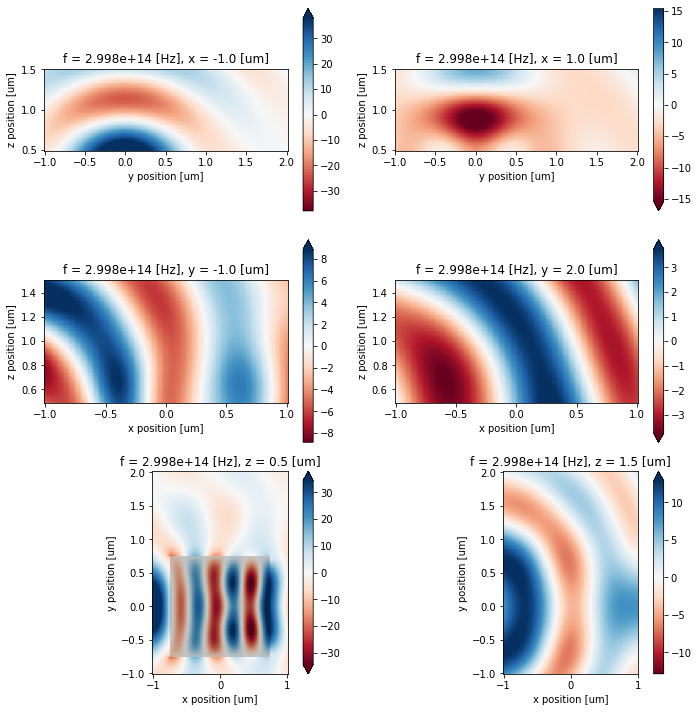

In [6]:
# Plot fields on each surface of the box

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10, 10)

# Plot fields at each of the surface monitors
data.plot_field(field_monitor_name='field_x-', field_name='Ey', x=mon_center[0]-mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][0])
data.plot_field(field_monitor_name='field_x+', field_name='Ey', x=mon_center[0]+mon_size[0]/2.0, val='real', freq=freq0, ax=axs[0][1])
data.plot_field(field_monitor_name='field_y-', field_name='Ey', y=mon_center[1]-mon_size[1]/2.0, val='real', freq=freq0, ax=axs[1][0])
data.plot_field(field_monitor_name='field_y+', field_name='Ey', y=mon_center[1]+mon_size[1]/2.0, val='real', freq=freq0, ax=axs[1][1])
data.plot_field(field_monitor_name='field_z-', field_name='Ey', z=mon_center[2]-mon_size[2]/2.0, val='real', freq=freq0, ax=axs[2][0])
data.plot_field(field_monitor_name='field_z+', field_name='Ey', z=mon_center[2]+mon_size[2]/2.0, val='real', freq=freq0, ax=axs[2][1])

fig.tight_layout()